In [10]:
import pandas as pd 
import os
import numpy as np 
from scipy.stats import sem
import matplotlib.pyplot as plt
importpath = r'C:\Users\nmur1\Google Drive\Springboard\Capstone2\CleanData'
os.chdir(importpath)

#import datasets from cleaning
quant = 'Historical_Quant'
data = pd.read_pickle(quant).dropna()
data['DI_Plus_R'] = data['DI_Plus_R'].replace([np.inf, -np.inf], 0)
data['Pos_Coef'] = data.DI_Plus_Slope * data.DI_Plus_R
import StockMetrics
import seaborn as sns

# Description of Predictor Variables

Text(0.5, 1.0, 'Distribution of Predictor Variables')

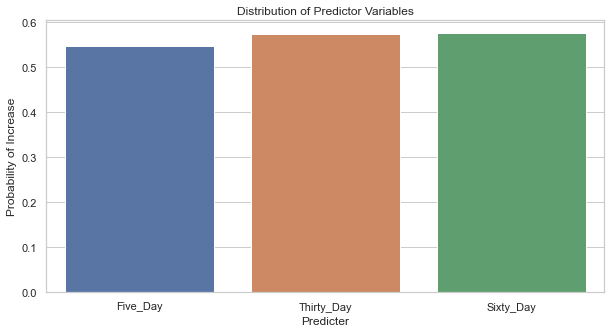

In [11]:
dist = pd.DataFrame([data.Five_Day.mean(), data.Thirty_Day.mean(), data.Sixty_Day.mean()], index = ['Five_Day', 'Thirty_Day',
                                                                                         'Sixty_Day'], columns = ['Prob'])


plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x = 'index', y = 'Prob', data = dist.reset_index())
plt.xlabel('Predicter')
plt.ylabel('Probability of Increase')
plt.title('Distribution of Predictor Variables')

The final cleaned dataset includes daily prices and relevant annual balance sheet and income statement metrics for 500 stocks
Daily pricing data and technical indicator calculations go back approximately 5 years (from January 1, 2015)
See below for a detailed review of metrics

Metric Definitions

| Index 	| Metric 	| Description 	|
|-:	|-	|:-	|
| 1 	| Date 	| Trading Date 	|
| 2 	| Close 	| Closing stock price on trading date 	|
| 3 	| DI_Plus 	| Positive Directional   Indicator(DI +): A multi stepped calculation to indicate the direction of a   stocks trend:                   	|
|  	| DI + Step 1 	| Calculate Directional Movement   (DM) by subtracting the current day high minus the prior day low. Return zero   if the value is negative, else return current day high minus prior day high. 	|
|  	| DI + Step 2 	| the DI + is equal to the 14 day   exponential moving average (EMA) of Directional Movement divided by the 14   day EMA of the True Range.  	|
|  	| DI + Step 3 	| Note the Negative Directional   Indicator (DI - ) is calculated in similar fashion. However the Directional   Movement is calculated by using yeserday's low minus today's low. If that   value is positive then return the value, else return zero. 	|
| 4 	| True Range 	| The True range is equal to the   greater of: [Current day high minus current day low], [Absolute value of   current day high minus yesterday's close], [Absolute value of current day low   minus yesterday's close] 	|
| 5 	| ADX 	| The 14 day EMA of the   Directional Index (DI). Directional Index (DI) is calculated as follows:   [absolute value of (DI+) less (DI-)] divided by [absolute value of (DI+) plus   (DI-)]  	|
| 6 	| DI_Plus_Slope 	| Calculates the slope of DI+   over the prior seven days 	|
| 7 	| DI_Plus_R 	| Calculates the R Squared value   of the DI Plus Slope 	|
| 8 	| SMA 	| 20 Day Moving Average 	|
| 9 	| UpperB 	| Upper Bollinger Band: 20 Day   Moving Average plus 20 Day Standard Deviation x 2 	|
| 10 	| LowerB 	| Lower Bollinger Band: 20 Day   Moving Average minus 20 Day Standard Deviation x 2 	|
| 11 	| Off_SMA 	| Percent of current close from   the SMA 	|
| 12 	| Off_LB 	| Percent of current close from   the LowerB  	|
| 13 	| Ticker 	| Stock trading ticker symbol 	|
| 14 	| eps 	| prior year earnings per share.   I.e. if stock price date is in year 2020 it will return 2019's eps.  	|
| 15 	| ROE 	| prior return on equity e. I.e.   if stock price date is in year 2020 it will return 2019's eps.  	|
| 16 	| Sector 	| Company Sector/Industry 	|
| 17 	| D2C 	| Total Company Debt divided by   Total Cash (prior year value used) 	|
| 18 	| epsgrowth 	| YOY eps growh 	|
| 19 	| Sales 	| Prior year sales 	|
| 20 	| Percent_Buy 	| Analyst ratings - percent who   ranked a buy 	|
| 21 	| E_Season 	| Earnings Season: flags a value   of 1 if the date is within plus or minus 6 days of the company's earnings   relase date 	|
| 22 	| PE_Ratio 	| 20 Day Moving Average close   price divided by prior year eps 	|
| 23 	| Relative_PE 	| Percent variance of stock PE   Ratio from it's respective Sector's PE Ratio 	|
| 24 	| Sales_Ratio 	| Sales to Earnings Ratio. 20 Day   moving average close price divided by prior year sales ratio. Sales ratio =   total sales divided by total shares outstanding 	|
| 25 	| Relative_SR 	| Percent Variance of stock Sales   Ratio from it's respective Sector's Sales Ratio 	|
| 26 	| Pos_Coef 	| The prior 7 day slope of the   DI+ indicator x it's R squared (comines both direction and strength of slope) 	|

In [12]:
data['SignalVar'] = data.EMA / data.SMA
chart = data.copy(deep = True) #make copy for charts

In [13]:
chart['5pct'] = (chart.Five_Day_avg - chart.Close) / chart.Close
chart['30pct'] = (chart.Thirty_Day_avg - chart.Close) / chart.Close
chart['60pct'] = (chart.Sixty_Day_avg - chart.Close) / chart.Close

#drop columns
data = data.drop(columns = ['Five_Day_avg', 'Thirty_Day_avg', 'Sixty_Day_avg'])

In [14]:
chart['month'] = pd.DatetimeIndex(chart['Date']).month
chart['Year'] = pd.DatetimeIndex(chart['Date']).year
print(chart.columns)
print(data.columns)

Index(['Date', 'Close', 'DI_Plus', 'ADX', 'CMF', 'DI_Plus_Slope', 'DI_Plus_R',
       'SMA', 'UpperB', 'LowerB', 'Off_SMA', 'Off_LB', 'Ticker', 'eps', 'ROE',
       'Sector', 'D2C', 'epsgrowth', 'Sales', 'Percent_Buy', 'PE_Ratio',
       'Relative_PE', 'Sales_Ratio', 'Relative_SR', 'E_Season', 'Five_Day',
       'Thirty_Day', 'Sixty_Day', 'Pos_Coef', 'EMA', 'SignalVar',
       'Five_Day_avg', 'Thirty_Day_avg', 'Sixty_Day_avg', '5pct', '30pct',
       '60pct', 'month', 'Year'],
      dtype='object')
Index(['Date', 'Close', 'DI_Plus', 'ADX', 'CMF', 'DI_Plus_Slope', 'DI_Plus_R',
       'SMA', 'UpperB', 'LowerB', 'Off_SMA', 'Off_LB', 'Ticker', 'eps', 'ROE',
       'Sector', 'D2C', 'epsgrowth', 'Sales', 'Percent_Buy', 'PE_Ratio',
       'Relative_PE', 'Sales_Ratio', 'Relative_SR', 'E_Season', 'Five_Day',
       'Thirty_Day', 'Sixty_Day', 'Pos_Coef', 'EMA', 'SignalVar'],
      dtype='object')


In [15]:
plotlydf = chart.groupby(['Sector', 'Year'])['Thirty_Day'].mean()
plotlydf = plotlydf.reset_index()
import plotly.express as px
import plotly.graph_objects as go


df = plotlydf
fig = go.Figure()



fig = px.bar(df,
             y="Sector",
             x="Thirty_Day",
             animation_frame="Year",
             orientation='h',
             range_x=[0, df.Thirty_Day.max()],
             color="Thirty_Day")



# improve aesthetics (size, grids etc.)
fig.update_layout(width=1000,
                  height=800,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  title_text='Percent of Increases by Sector',
                  showlegend=False)
fig.update_xaxes(title_text='Percent of Increases')
fig.update_yaxes(title_text='')
fig.write_html("Increases_by_Sector.html")

fig.show()

In [16]:
import plotly.graph_objects as go

import pandas as pd

# Load dataset
df = chart.groupby(['Date'])[['Five_Day', 'Thirty_Day', 'Sixty_Day']].mean()

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Five_Day),
               name="Five_Day",
               line=dict(color="DarkOrange")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Five_Day.mean()] * len(df.index),
               name="Five Day Average",
               visible=False,
               line=dict(color="DarkOrange", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Thirty_Day),
               name="Thirty_Day",
               line=dict(color="#33CFA5")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Thirty_Day.mean()] * len(df.index),
               name="Thirty Day Average",
               visible=False,
               line=dict(color="#33CFA5", dash="dash")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=list(df.Sixty_Day),
               name="Sixty Day",
               line=dict(color="#F06A6A")))

fig.add_trace(
    go.Scatter(x=list(df.index),
               y=[df.Sixty_Day.mean()] * len(df.index),
               name="Sixty Day Average",
               visible=False,
               line=dict(color="#F06A6A", dash="dash")))

# Add Annotations and Buttons

five_annotations = [dict(x="2016-01-01",
                         y=df.Five_Day.mean(),
                         xref="x", yref="y",
                         text="Five Day Average:<br> %.3f" % df.Five_Day.mean(),
                         ax=0, ay=-40),
                    dict(x=df.Five_Day.idxmax(),
                         y=df.Five_Day.max(),
                         xref="x", yref="y",
                         text="Five Day Max:<br> %.3f" % df.Five_Day.max(),
                         ax=0, ay=-40)]


high_annotations = [dict(x="2016-01-01",
                         y=df.Thirty_Day.mean(),
                         xref="x", yref="y",
                         text="Thirty Day Average:<br> %.3f" % df.Thirty_Day.mean(),
                         ax=0, ay=-40),
                    dict(x=df.Thirty_Day.idxmax(),
                         y=df.Thirty_Day.max(),
                         xref="x", yref="y",
                         text="Thirty Day Max:<br> %.3f" % df.Thirty_Day.max(),
                         ax=0, ay=-40)]





low_annotations = [dict(x="2016-01-01",
                        y=df.Sixty_Day.mean(),
                        xref="x", yref="y",
                        text="Sixty Day Average:<br> %.3f" % df.Sixty_Day.mean(),
                        ax=0, ay=40),
                   dict(x=df.Sixty_Day.idxmax(),
                        y=df.Sixty_Day.min(),
                        xref="x", yref="y",
                        text="Sixty Day Max:<br> %.3f" % df.Sixty_Day.max(),
                        ax=0, ay=40)]

fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="None",
                     method="update",
                     args=[{"visible": [True, False, True, False, True, False]},
                           {"title": "Daily Percent Increases",
                            "annotations": []}]),
                
                dict(label="Five_Day",
                     method="update",
                     args=[{"visible": [True, True, False, False, False, False]},
                           {"title": "Five Day Avg Daily Percent Increases",
                            "annotations": five_annotations}]),
                
                
                
                dict(label="Thirty Day",
                     method="update",
                     args=[{"visible": [False, False, True, True, False, False]},
                           {"title": "Thirty Day Avg Daily Percent Increases",
                            "annotations": high_annotations}]),
                dict(label="Sixty Day",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, True]},
                           {"title": "Sixty Day Avg Daily Percent Increases",
                            "annotations": low_annotations}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [True, True, True, True, True, True]},
                           {"title": "Daily Percent Increases",
                            "annotations": high_annotations + low_annotations}]),
            ]),
        )
    ])

# Set title
fig.update_layout(title_text="Daily Percent of Increases")
fig.write_html("Daily Changes.html")
fig.show()

In [17]:
chart.Sixty_Day.mean()

0.5746406511064964

In [18]:
dflist = []
for y in ['Five_Day','Thirty_Day', 'Sixty_Day']:

    df = chart.groupby(['Sector', 'Year'])[y].mean()
    df = df.reset_index()
    df.columns = ['Sector', 'Year', 'Percent_Inc']
    df['Type'] = y
    dflist.append(df)

plotlydf2 = pd.concat(dflist)


In [19]:
labels = list(plotlydf2.groupby('Sector').Percent_Inc.mean().index)
choices = list(['Five_Day', 'Thirty_Day', 'Sixty_Day'])


for i in range(0,3):
    for n in labels:
        choices.append(n)



In [20]:
parents = ["","",""]

for x in ['Five_Day','Sixty_Day','Thirty_Day']:
    for i in range (0,11):
        parents.append(x)
    


In [21]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
df = plotlydf2
fig = go.Figure(go.Sunburst(
    labels= choices,
    parents=parents,
    values=np.append(
        df.groupby('Type').Percent_Inc.mean().values,
        df.groupby(['Type', 'Sector']).Percent_Inc.mean().values),
    marker=dict(colors=px.colors.sequential.Emrld)),
                layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)',
                                 plot_bgcolor='rgba(0,0,0,0)'))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0),
                  title_text='Tipping Habbits Per Gender, Time and Day')
fig.show()


In [22]:
import matplotlib.pyplot as plt
import warnings


def plottech(df, ticker, dstart, dend):

    d = df.loc[df.Ticker == ticker]
    d = d.loc[(d.Date > dstart) & (d.Date <= dend)]

    plt.style.use('seaborn')
    warnings.simplefilter(action='ignore', category=FutureWarning)

    fig, axs = plt.subplots(3, 1, figsize = (10,10))

   
    x = d.Date
    
    y1 = d.UpperB
    y2 = d.LowerB
    y3 = d.SMA
    y4 = d.Close
    y5 = d.DI_Plus
    y6 = d.ADX
    y7 = d.CMF
    
    axs[0].plot(x, y1, label = "Upper Bollinger Band")
    axs[0].plot(x, y2, label = "Lower Bollinger Band")
    axs[0].plot(x, y3, label = "20 Day Moving Average")
    axs[0].plot(x, y4, label = "Close", color='red', marker='o')
    
    
    
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Price')
    axs[0].legend()
    
 
    axs[1].plot(x, y5, label = 'DI Plus')
    axs[1].plot(x, y6, label = 'ADX')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Value')
    axs[1].legend()
    
    axs[2].plot(x, y7)
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('CMF')
   
    
    
    
    ptitle = ticker + 'Technical Indicators'
    axs[1].set_title('ADX and DI')
    axs[0].set_title('Moving Average and Bollinger Bands')
    axs[2].set_title('Chakin Money Flow')
    fig.tight_layout()
    plt.show()

In [23]:


def pt(df, glevel1, glevel2, field, method = 'pct'):
    
    if method == 'pct':
        calc1 = '5pct'
        calc2 = '30pct'
        calc3 = '60pct'
    else:
        calc1 = 'Five_Day'
        calc2 = 'Thirty_Day'
        calc3 = 'Sixty_Day'
    
    Q1 = df.quantile(.25)
    Q3 = df.quantile(.75)
    IQR = Q3 - Q1

    fig, axs = plt.subplots(1, 3, figsize = (15,5))
    
    df = df[[glevel1, glevel2, field, calc1, calc2, calc3]]
    df = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
    x = df.groupby([glevel1, glevel2])[field].mean().values
    y1 = df.groupby([glevel1, glevel2])[calc1].mean().values
    x = df.groupby([glevel1, glevel2])[field].mean().values
    y2 = df.groupby([glevel1, glevel2])[calc2].mean().values
    x = df.groupby([glevel1, glevel2])[field].mean().values
    y3 = df.groupby([glevel1, glevel2])[calc3].mean().values
    
    cor1 = round(np.corrcoef(x,y1)[0][1],2)
    cor2  = round(np.corrcoef(x,y2)[0][1],2)
    cor3 = round(np.corrcoef(x,y3)[0][1],2)
    
    axs[0].scatter(x, y1, label='data', color='red', marker='o')
    axs[0].set_title('Correlation:' + str(cor1))
    axs[0].set_ylabel('Average 5 Day Return')
    axs[0].set_xlabel(field)

   
    axs[1].scatter(x, y2, label='data', color='red', marker='o')
    axs[1].set_title('Correlation:' + str(cor2))
    axs[1].set_ylabel('Average 30 Day Return')
    axs[1].set_xlabel(field)
    
   
    axs[2].scatter(x, y3, label='data', color='red', marker='o')    
    axs[2].set_title('Correlation:' + str(cor3))
    axs[2].set_ylabel('Average 60 Day Return')
    axs[2].set_xlabel(field)
    
    


In [24]:
import seaborn as sns


def dislope(df, dstart, dend,ticker):

    
    

    warnings.simplefilter(action='ignore', category=FutureWarning)

    fig, axs = plt.subplots(3, 1, figsize = (10,10))


    plt.style.use('seaborn')
    
    df.Date = df.Date.astype('str')
    
    #filter df
    d = df.loc[df.Ticker == ticker]
    d = d.loc[(d.Date > dstart) & (d.Date <= dend)]
    
    #calculate r, slope, r * slope
    dr = d.loc[(df.Date == dend)]['DI_Plus_R'].ravel()[0]
    dr = round(dr,2 )
    
    ds = d.loc[(df.Date == dend)]['DI_Plus_Slope'].ravel()[0]
    ds = round(ds,2)
    
    pc = round(dr * ds,2)
    
    five = round(d.loc[(df.Date == dend)]['5pct'].ravel()[0],4) 
    thirty = round(d.loc[(df.Date == dend)]['30pct'].ravel()[0],4)
    sixty = round(d.loc[(df.Date == dend)]['60pct'].ravel()[0],4) 
    
    #set title
    ptitle = ticker + ' DI Slope: '+ str(ds) + ' DI R Square: ' +  str(dr) +  ' Pos Coef: '+  str(pc) 
    title2 =  'Closing Price' + ' 5 day future: '+ str(five) + ' 30 day future: ' +  str(thirty) +  ' 60 day future: '+  str(sixty) 

    
    #set array for trend line
    x = np.arange(0,len(d),1)
    
    axs[0].scatter(d['Date'], d['DI_Plus'], label='DI +', color='red', marker='o')
    axs[0].plot(d['Date'], d['ADX'], label='ADX', color='green', marker='o')

    # Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
    sns.regplot(ax = axs[0],x=x, y='DI_Plus', data=d, color='blue', scatter=None, order = 1, label='DI_Plus_Slope')
  

    axs[0].legend(loc = 'upper right')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Value')
    
    axs[0].set_title(ptitle)
    
    axs[1].plot(d['Date'], d['CMF'], color='green', marker='o')
    axs[1].set_title('Chakin Money Flow')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Value')
    
    axs[2].plot(d['Date'], d['Close'], color='green', marker='o')
    axs[2].set_title(title2)
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Value')
    
    

    fig.tight_layout()
    plt.show()


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

#make a seaborn graph based on value counts of a given categorical variable

def catplots(df, field):

    f, ax = plt.subplots(figsize=(10, 10))
    # In the following brackets, we want the value_counts() of the states 
    x = pd.DataFrame(df[field].value_counts())
    
    # Get the state names by calling list() on the x.index
    #value counts returns a data frame with the state as the index and the counts as the values
    #need to convert the names and values into two separate lists to properly plot in seaborn
    names = list(x.index)

    # Get the values by plugging x.state into the list() function
    values = list(x[field])

    # We're now going to call the barplot() method on our sns seaborn object. 
    # If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
    return sns.barplot(x=values, y=names, palette="RdBu_r")


In [26]:
import seaborn as sns
sns.set(style="whitegrid")


def cat(group, df):
    s = df[group].value_counts().index
    y1 = df.groupby(group)['Five_Day'].mean().values
    y2 = df.groupby(group)['Thirty_Day'].mean().values
    y3 = df.groupby(group)['Sixty_Day'].mean().values

    cat = pd.DataFrame([s,y1,y2,y3]).T
    cat.columns = [group,'5day', '30day', '60day']
    cat = cat.melt(id_vars = [group], value_name = 'Inc')
    #return cat

    #overall probability 
    
    f = round(df.Five_Day.mean(),2)
    t = round(df.Thirty_Day.mean(),2)
    s = round(df.Sixty_Day.mean(),2)
    
    ptitle = 'Five Day Prob: ' + str(f) + ' Thirty Day Prob: ' + str(t)+ ' Sixty Day Prob: ' + str(s)

   
    g = sns.catplot(x='Inc', y=group, hue="variable", data=cat,
                    height=6, palette="muted",orient="h", kind = 'bar')
    
    
    plt.title(ptitle)
    
    
    g.despine(left=True)
    sns.set(rc={'figure.figsize':(20,20)})
    
    g.set_xlabels("Increase Probability")
    g.set_xticklabels(rotation=90)
  

Text(0.5, 1.0, 'Company Distribution by Sector')

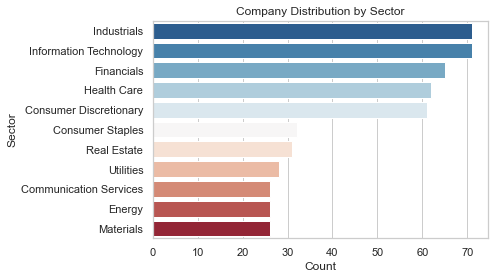

In [27]:
#Sector = catplots(pd.DataFrame(chart.groupby(['Ticker', 'Sector']).Sector.nunique()), 'Sector')
sectorcount = chart.groupby(['Ticker', 'Sector']).Sector.nunique()
sectorcount = pd.DataFrame(sectorcount.groupby('Sector').sum())
sectorcount.columns = ['Count']
sectorcount.sort_values(by = 'Count', ascending = False, inplace = True)
sns.barplot(x=sectorcount.Count, y=sectorcount.index, palette="RdBu_r")
plt.title('Company Distribution by Sector')

Text(0.5, 1.0, 'Total Revenue Distribution in Billions')

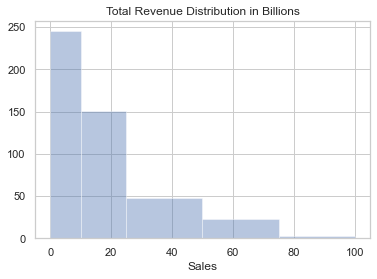

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
chart.Sales.describe()
Sales = chart.groupby('Ticker')['Sales'].max()
Sales = Sales/1000000
sns.distplot(Sales, bins = [0,10,25,50,75,100], kde = False)
plt.title('Total Revenue Distribution in Billions')

# Technical Indicator and DI Slope Examples

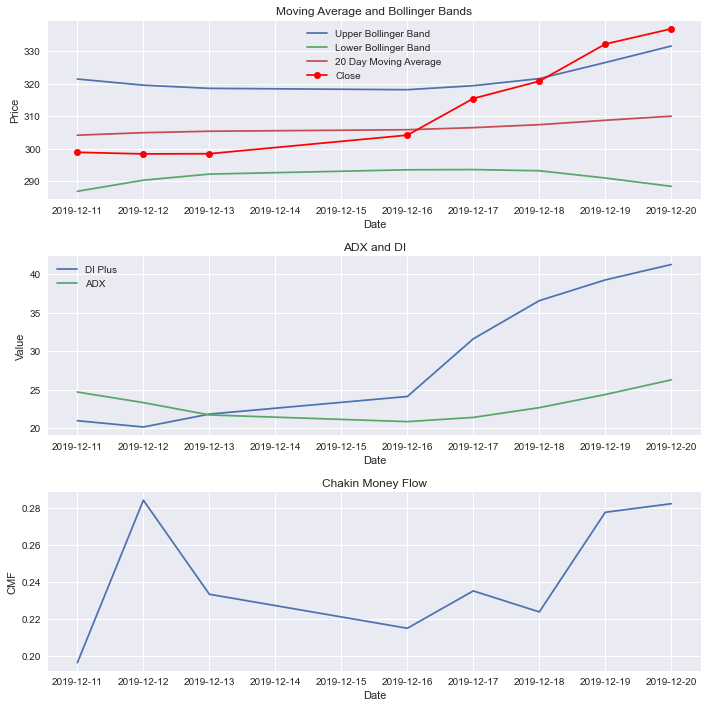

In [29]:
plottech(chart,'NFLX', '2019-12-10','2019-12-20')

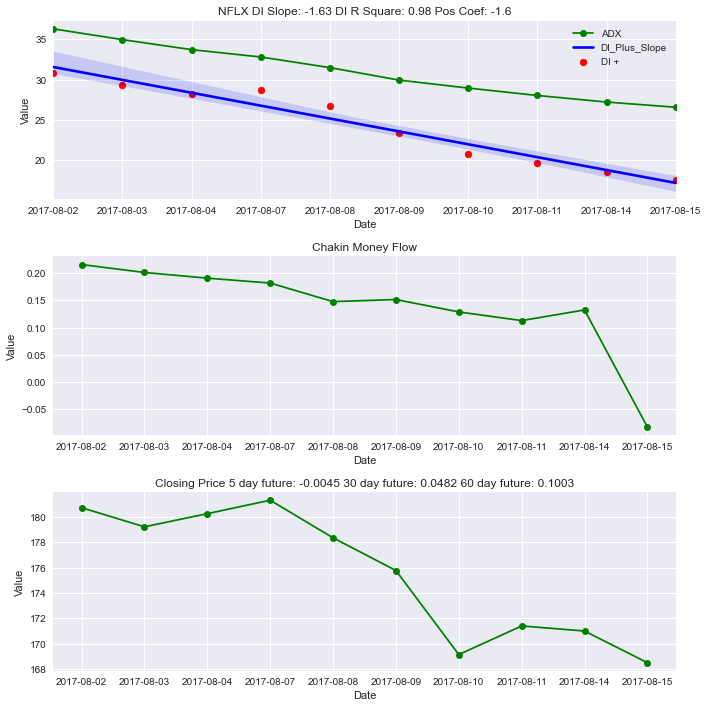

In [30]:
dislope(chart, '2017-08-01','2017-08-15', 'NFLX')

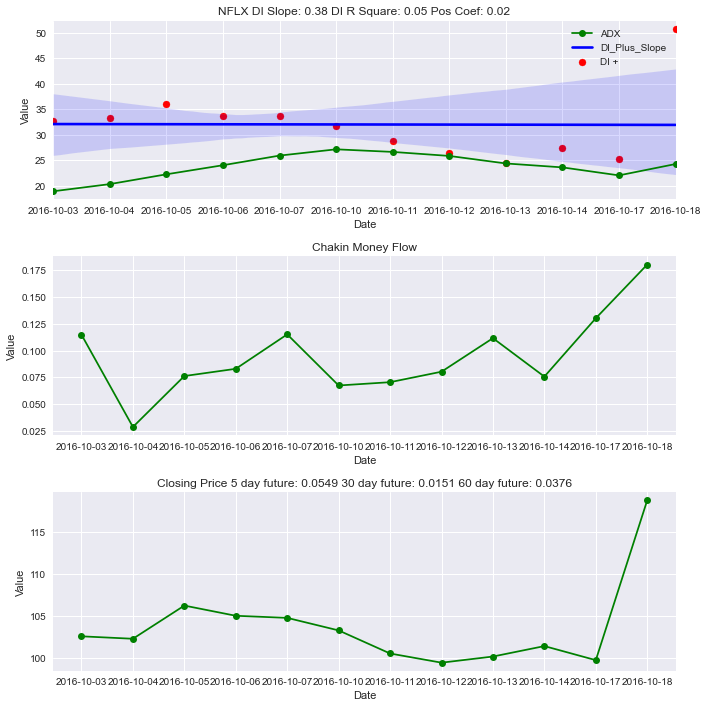

In [31]:
dislope(chart, '2016-10-01','2016-10-18', 'NFLX')

In [32]:
chart.shape

(566789, 39)

# General Probability of Up or Down

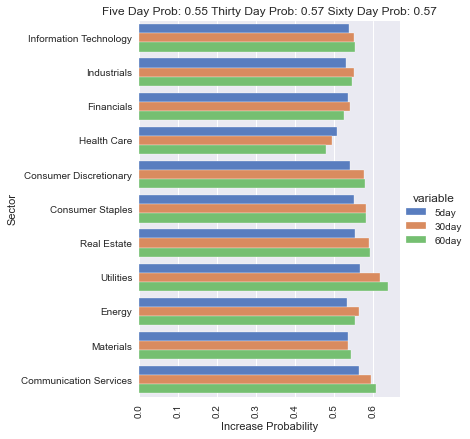

In [33]:
cat('Sector',chart)

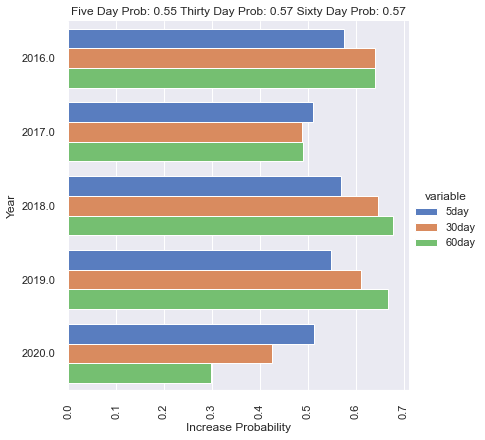

In [34]:
cat('Year', chart)

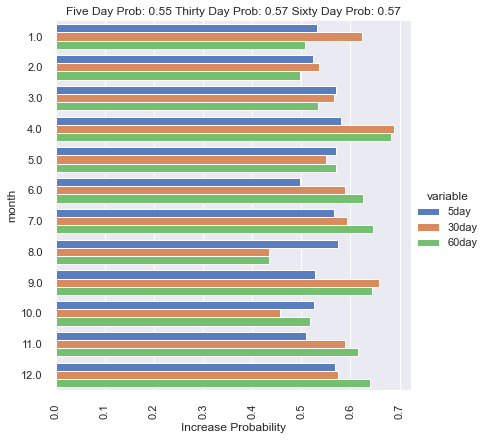

In [35]:
cat('month',chart)

In [36]:
signal1 = chart[(chart.SignalVar < 1)]

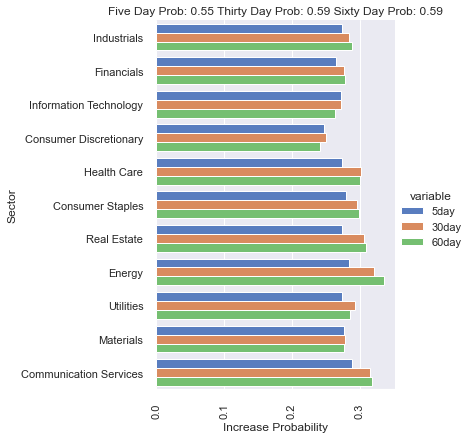

In [37]:
cat('Sector',signal1)

292


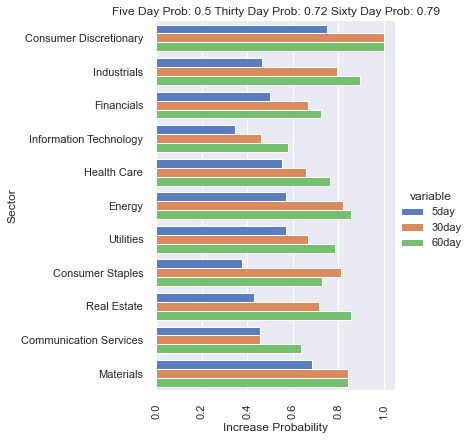

In [38]:
cat('Sector',signal1[signal1.Pos_Coef>1])
print(len(signal1[signal1.Pos_Coef>1]))

# Correlation Exploration with 5, 30, and 60 day returns

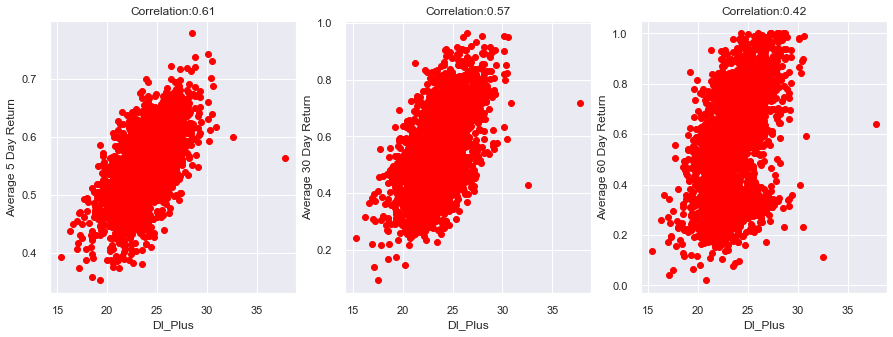

In [39]:
pt(chart,'Ticker','Year','DI_Plus', method = 'd')

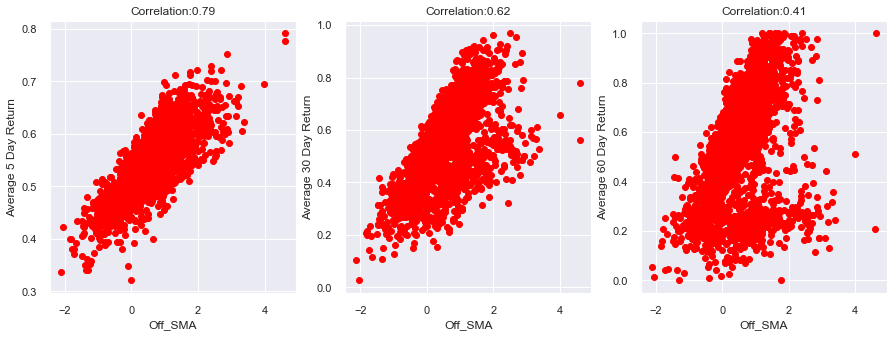

In [40]:
pt(chart,'Ticker','Year','Off_SMA', method = 'd')

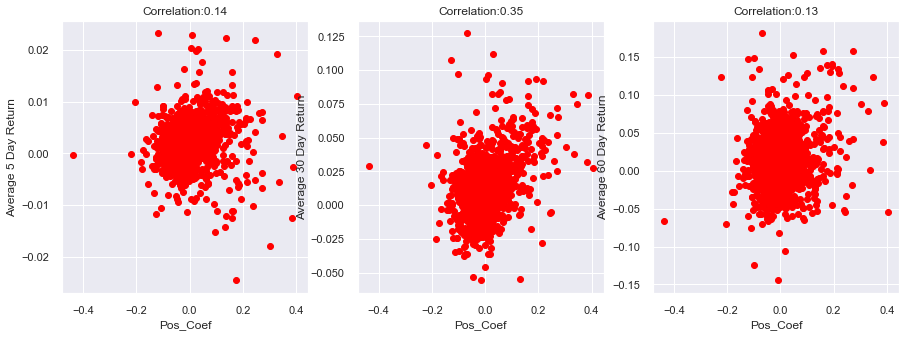

In [41]:
pt(chart,'Ticker','Year','Pos_Coef', method = 'pct')

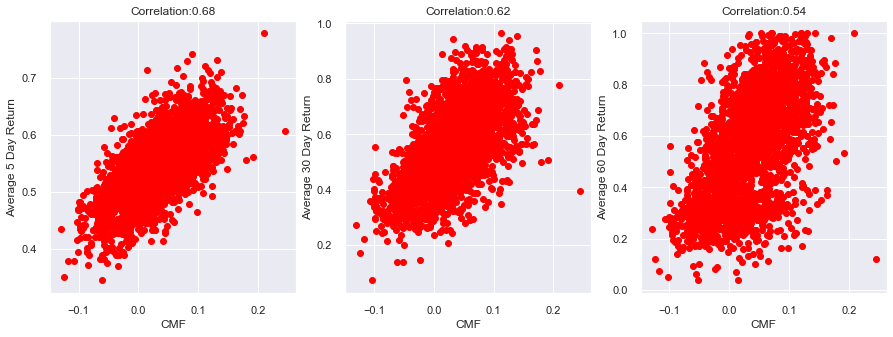

In [42]:
pt(chart,'Ticker','Year','CMF', method = 'd')

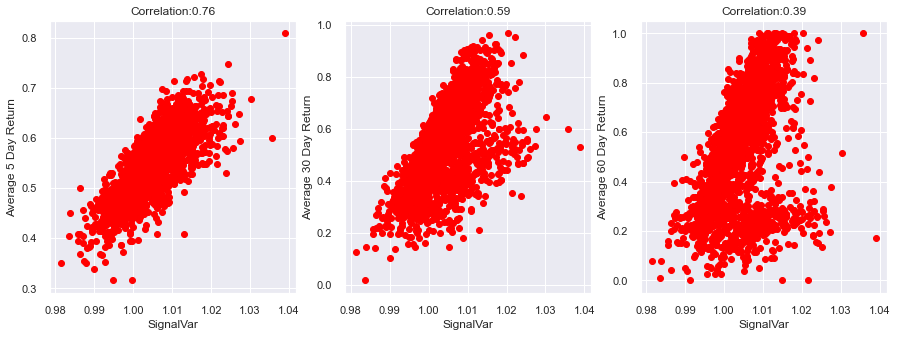

In [43]:
pt(chart, 'Ticker', 'Year', 'SignalVar', method = 'd')

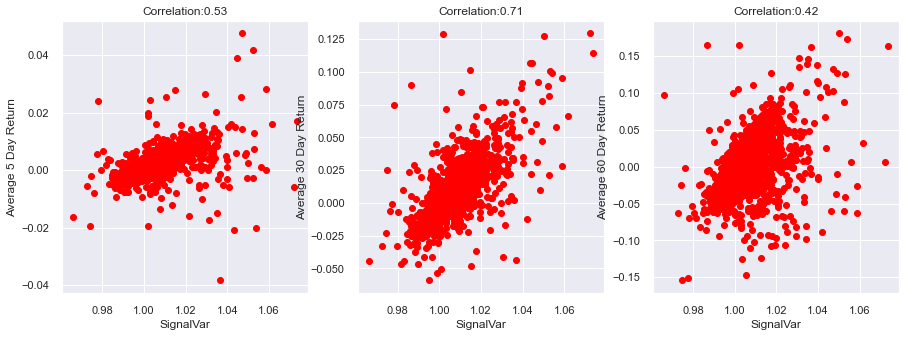

In [44]:
chart['SignalVar'] = chart.EMA/chart.SMA
pt(chart, 'Ticker', 'Year', 'SignalVar', method = 'pct')

In [45]:

signal1[signal1.Pos_Coef>1].to_clipboard()

# Earnings Season Impact on Volatility

#### Closing Prices Trading with in the Earnings Season (Plus or Minus 6 days from their respective release date) tend to be more volatile then prices outside the window

#### The earnings season flag is currently used as a feature in the model, but due to the volatility around this time period I will test scenarios that remove data trading in this window

In [46]:
x = pd.DataFrame(chart.groupby(['Ticker','E_Season'])['Close'].sem(ddof = 1)).reset_index()


sem1 = x[x.E_Season == 0].Close.mean()
sem2 = x[x.E_Season == 1].Close.mean()
print('Average standard error by Ticker outside earnings window: ' + str(round(sem1,4)))
print('Average standard error by ticker inside earnings window: ' + str(round(sem2,4)))


Average standard error by Ticker outside earnings window: 0.8897
Average standard error by ticker inside earnings window: 1.7891


#### Standard Error across all tickers nearly doubles between the two timeframes. The Category plots below show this trend by sector and year year

Text(0.5, 1.0, 'Standard Error by Segmented by Earnings Season')

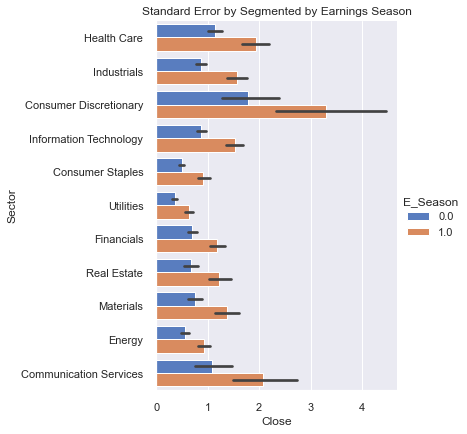

In [47]:
x = chart.groupby(['Year','Ticker','E_Season'])['Close'].sem(ddof = 1)
Earnings = pd.DataFrame(x).reset_index()

Sector = chart[['Ticker','Sector']].drop_duplicates()
Earnings = Earnings.merge(Sector, on = 'Ticker')
g = sns.catplot(x='Close', y='Sector', hue="E_Season", data=Earnings,
                    height=6, palette="muted",orient="h", kind = 'bar')

plt.title('Standard Error by Segmented by Earnings Season')

Text(0.5, 1.0, 'Standard Error by Segmented by Earnings Season')

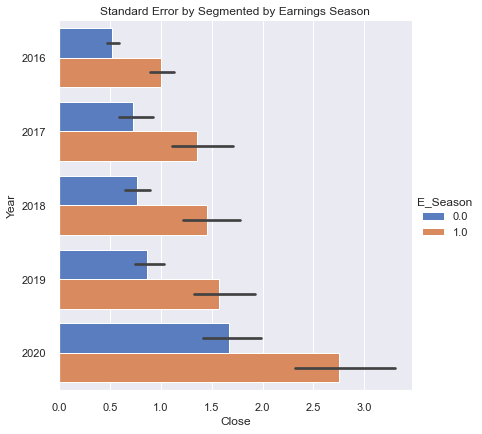

In [48]:
g = sns.catplot(x='Close', y='Year', hue="E_Season", data=Earnings,
                    height=6, palette="muted",orient="h", kind = 'bar')

plt.title('Standard Error by Segmented by Earnings Season')

In [49]:
Q1 = chart.Relative_SR.quantile(.25)
Q3 = chart.Relative_SR.quantile(.75)
IQR  = Q3 - Q1

chart['Outlier'] = (((chart.Relative_SR < (Q1 - 1.5 * IQR)) |(chart.Relative_SR> (Q3 + 1.5 * IQR))))

Text(0.5, 1.0, 'Standard Error Segmented by PE and Sales Ratio Outliers')

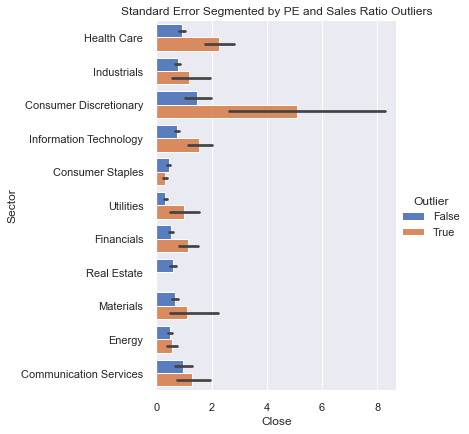

In [50]:
x = chart.groupby(['Year','Ticker','Outlier'])['Close'].sem(ddof = 1)
Earnings = pd.DataFrame(x).reset_index()

Sector = chart[['Ticker','Sector']].drop_duplicates()
Earnings = Earnings.merge(Sector, on = 'Ticker')
Earnings
g = sns.catplot(x='Close', y='Sector', hue="Outlier", data=Earnings,
                    height=6, palette="muted",orient="h", kind = 'bar')

plt.title('Standard Error Segmented by PE and Sales Ratio Outliers')

In [51]:

corr = data.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,Close,DI_Plus,ADX,CMF,DI_Plus_Slope,DI_Plus_R,SMA,UpperB,LowerB,Off_SMA,Off_LB,eps,ROE,D2C,epsgrowth,Sales,Percent_Buy,PE_Ratio,Relative_PE,Sales_Ratio,Relative_SR,E_Season,Five_Day,Thirty_Day,Sixty_Day,Pos_Coef,EMA,SignalVar
Close,1.000000,0.040000,0.020000,0.040000,0.000000,-0.010000,1.000000,1.000000,1.000000,0.040000,-0.000000,0.820000,0.020000,-0.040000,-0.000000,0.100000,0.100000,0.030000,0.030000,0.180000,0.230000,0.000000,0.000000,0.000000,-0.010000,0.000000,1.000000,0.030000
DI_Plus,0.040000,1.000000,0.050000,0.470000,0.520000,-0.090000,0.020000,0.020000,0.020000,0.720000,0.090000,0.010000,0.000000,-0.040000,0.000000,0.020000,0.040000,-0.010000,-0.010000,0.000000,0.020000,0.030000,-0.020000,-0.040000,-0.060000,0.490000,0.040000,0.410000
ADX,0.020000,0.050000,1.000000,0.050000,-0.030000,0.110000,0.020000,0.030000,0.010000,-0.110000,0.040000,0.010000,0.000000,-0.020000,-0.000000,0.000000,0.000000,0.020000,0.010000,0.010000,0.020000,-0.010000,-0.010000,0.000000,0.030000,-0.040000,0.020000,-0.050000
CMF,0.040000,0.470000,0.050000,1.000000,0.180000,-0.040000,0.030000,0.020000,0.030000,0.440000,0.040000,0.000000,0.000000,0.030000,-0.000000,-0.030000,0.020000,0.000000,0.000000,0.070000,0.050000,0.010000,-0.010000,0.000000,0.020000,0.180000,0.040000,0.270000
DI_Plus_Slope,0.000000,0.520000,-0.030000,0.180000,1.000000,-0.120000,-0.010000,-0.010000,-0.020000,0.530000,0.080000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.020000,-0.030000,0.050000,-0.000000,-0.010000,0.010000,0.960000,-0.000000,0.280000
DI_Plus_R,-0.010000,-0.090000,0.110000,-0.040000,-0.120000,1.000000,-0.010000,-0.000000,-0.010000,-0.080000,0.010000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.010000,0.010000,0.000000,-0.020000,-0.010000,-0.000000,0.000000,0.020000,0.020000,-0.160000,-0.010000,-0.020000
SMA,1.000000,0.020000,0.020000,0.030000,-0.010000,-0.010000,1.000000,1.000000,1.000000,0.020000,-0.000000,0.820000,0.020000,-0.040000,-0.000000,0.100000,0.100000,0.030000,0.030000,0.180000,0.230000,0.000000,0.010000,0.010000,-0.000000,-0.010000,1.000000,0.020000
UpperB,1.000000,0.020000,0.030000,0.020000,-0.010000,-0.000000,1.000000,1.000000,0.990000,0.010000,-0.000000,0.820000,0.020000,-0.040000,-0.000000,0.100000,0.100000,0.030000,0.030000,0.180000,0.220000,0.000000,0.000000,0.010000,-0.000000,-0.010000,1.000000,0.020000
LowerB,1.000000,0.020000,0.010000,0.030000,-0.020000,-0.010000,1.000000,0.990000,1.000000,0.020000,-0.010000,0.810000,0.020000,-0.040000,-0.000000,0.100000,0.100000,0.030000,0.030000,0.180000,0.230000,0.000000,0.010000,0.010000,-0.010000,-0.010000,1.000000,0.020000
Off_SMA,0.040000,0.720000,-0.110000,0.440000,0.530000,-0.080000,0.020000,0.010000,0.020000,1.000000,0.080000,0.010000,0.000000,-0.000000,0.000000,-0.010000,0.030000,-0.000000,0.000000,0.030000,0.030000,0.030000,-0.010000,-0.040000,-0.050000,0.510000,0.040000,0.550000


In [52]:
todrop = ['Close','UpperB', 'LowerB', 'EMA','SMA']

data2 = data.drop(columns = todrop)
corr = data2.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,DI_Plus,ADX,CMF,DI_Plus_Slope,DI_Plus_R,Off_SMA,Off_LB,eps,ROE,D2C,epsgrowth,Sales,Percent_Buy,PE_Ratio,Relative_PE,Sales_Ratio,Relative_SR,E_Season,Five_Day,Thirty_Day,Sixty_Day,Pos_Coef,SignalVar
DI_Plus,1.000000,0.050000,0.470000,0.520000,-0.090000,0.720000,0.090000,0.010000,0.000000,-0.040000,0.000000,0.020000,0.040000,-0.010000,-0.010000,0.000000,0.020000,0.030000,-0.020000,-0.040000,-0.060000,0.490000,0.410000
ADX,0.050000,1.000000,0.050000,-0.030000,0.110000,-0.110000,0.040000,0.010000,0.000000,-0.020000,-0.000000,0.000000,0.000000,0.020000,0.010000,0.010000,0.020000,-0.010000,-0.010000,0.000000,0.030000,-0.040000,-0.050000
CMF,0.470000,0.050000,1.000000,0.180000,-0.040000,0.440000,0.040000,0.000000,0.000000,0.030000,-0.000000,-0.030000,0.020000,0.000000,0.000000,0.070000,0.050000,0.010000,-0.010000,0.000000,0.020000,0.180000,0.270000
DI_Plus_Slope,0.520000,-0.030000,0.180000,1.000000,-0.120000,0.530000,0.080000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.020000,-0.030000,0.050000,-0.000000,-0.010000,0.010000,0.960000,0.280000
DI_Plus_R,-0.090000,0.110000,-0.040000,-0.120000,1.000000,-0.080000,0.010000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.010000,0.010000,0.000000,-0.020000,-0.010000,-0.000000,0.000000,0.020000,0.020000,-0.160000,-0.020000
Off_SMA,0.720000,-0.110000,0.440000,0.530000,-0.080000,1.000000,0.080000,0.010000,0.000000,-0.000000,0.000000,-0.010000,0.030000,-0.000000,0.000000,0.030000,0.030000,0.030000,-0.010000,-0.040000,-0.050000,0.510000,0.550000
Off_LB,0.090000,0.040000,0.040000,0.080000,0.010000,0.080000,1.000000,-0.000000,0.000000,-0.010000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.010000,-0.010000,0.000000,-0.000000,0.000000,0.000000,0.070000,0.040000
eps,0.010000,0.010000,0.000000,0.000000,-0.000000,0.010000,-0.000000,1.000000,0.030000,-0.030000,0.030000,0.070000,0.030000,-0.000000,0.020000,-0.030000,0.040000,0.000000,0.000000,0.010000,-0.000000,0.000000,0.010000
ROE,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.030000,1.000000,-0.030000,0.010000,0.020000,-0.010000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000
D2C,-0.040000,-0.020000,0.030000,-0.000000,-0.000000,-0.000000,-0.010000,-0.030000,-0.030000,1.000000,-0.010000,-0.070000,-0.030000,0.000000,0.000000,0.040000,0.010000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000


## Run a Quick Random Forest Classifier Using only 10 trees to get a starting point for accuracy

In [53]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

scores = {}
n = 0

#drop ticker, sector, and date for modeling
dfmodel = data2.drop(columns = ['Ticker','Sector','Date'])


#create dependants for 3 scenarios
dependents = [dfmodel["Five_Day"].to_list(), dfmodel["Thirty_Day"].to_list(), dfmodel["Sixty_Day"].to_list()]

#drop all dependents from model

X = dfmodel.drop(['Five_Day', 'Thirty_Day', 'Sixty_Day'], axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Standardize our data set

X.shape

(566789, 20)

In [54]:
scores = {}

for dep in dependents:
    X_train, X_test, y_train, y_test = train_test_split(X, dep, test_size=0.25, random_state=0)
    model = RandomForestClassifier(10, n_jobs = 1, random_state = 42, min_samples_leaf = 1, criterion = "gini")
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    ROC = round(roc_auc_score(y_test, ypred),3)
    Accuracy = round(accuracy_score(y_test,ypred),3)
    Recall = round(recall_score(y_test, ypred),3)
    Precision = round(precision_score(y_test, ypred),3)
    F1 = round(f1_score(y_test, ypred),3)
    scores[n] = [ROC,Accuracy, Recall, Precision, F1]
    
    print (scores[n])
    n = n + 1

[0.696, 0.695, 0.684, 0.738, 0.71]
[0.884, 0.885, 0.889, 0.907, 0.898]
[0.923, 0.923, 0.927, 0.939, 0.933]


In [55]:
Results = pd.DataFrame(scores)
Results.index = ['ROC', 'Accuray', 'Recall', 'Precision', 'F1']
Results.columns = ['5_Day', '30_Day', '60_Day']
Results

,5_Day,30_Day,60_Day
ROC,0.69600,0.88400,0.92300
Accuray,0.69500,0.88500,0.92300
Recall,0.68400,0.88900,0.92700
Precision,0.73800,0.90700,0.93900
F1,0.71000,0.89800,0.93300


In [56]:
data2.columns

Index(['Date', 'DI_Plus', 'ADX', 'CMF', 'DI_Plus_Slope', 'DI_Plus_R',
       'Off_SMA', 'Off_LB', 'Ticker', 'eps', 'ROE', 'Sector', 'D2C',
       'epsgrowth', 'Sales', 'Percent_Buy', 'PE_Ratio', 'Relative_PE',
       'Sales_Ratio', 'Relative_SR', 'E_Season', 'Five_Day', 'Thirty_Day',
       'Sixty_Day', 'Pos_Coef', 'SignalVar'],
      dtype='object')

In [ ]:
data2.to_csv('FinalModelingSet.csv')
data2.to_pickle('FinalModelingSet')